##### Week 18 Homework
###### Angela Spencer  - February 2, 2022

##### 1.	What is a neural network? What are the general steps required to build a neural network? 


Neural networks are a subset of machine learning in which input data is analyzed in a method that recreates the way a human's brain uses neural pathways to process data.  Neural networks take in features and pass the information through a series of non-linearly connected nodes in hidden layers of the network before outputing a predicted value.

A neural network is built with an input layer of feature data, 1 or more hidden layers containing a selected number of nodes that allow for non-linear connections between data points, and a final output layer that produces a categorical or continuous prediction. Once built, the model is compiled using an optimizer, which is a function that modifies the weights/relationship between the nodes of each layer in an effort to minimize the loss function.  The model is then fit to the training data and set for a specific number of epochs/cycles in which the optimizer modifies the weights between nodes in each layer and attempts to reduce the loss function more and more as the epochs continue. After fitting, the model can be used to make predictions on a validation data set.

##### 2.	Generally, how do you check the performance of a neural network? Why? 

A neural network model is evaluated on a validation dataset that is previously unseen by the model. Performance of a neural network is measured by evaluating the loss function or the difference between the actual target values and predicted target values.  There are many formulas for evaluating this loss: MAE, MSE, or RMSE for regression problems and categorical cross entropy for multi-class classification problems among many others depending on the type of data being analyzed.

##### 3.	Create a neural network using keras to predict the outcome of either of these datasets: 
    Cardiac Arrhythmia: https://archive.ics.uci.edu/ml/datasets/Arrhythmia 
    Abalone age: https://archive.ics.uci.edu/ml/datasets/Abalone


In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

from sklearn.linear_model import Lasso

import tensorflow as tf
tf.random.set_seed(42)

from tensorflow import keras
from tensorflow.keras import layers

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import KNeighborsRegressor
from sklearn.model_selection import GridSearchCV

from sklearn.metrics import mean_squared_error 
from sklearn.metrics import mean_absolute_error

import torch
torch.manual_seed(42)

import torch.nn as nn
import torch.nn.functional as F 

In [2]:
# convert .data file to dataframe with column names
col = ['sex', 'length', 'diameter', 'height', 'whole_weight', 'shucked_weight', 
       'viscera_weight', 'shell_weight', 'rings']
abalone = pd.read_csv('../Datasets/abalone.data', names=col)
abalone.head()

,sex,length,diameter,height,whole_weight,shucked_weight,viscera_weight,shell_weight,rings
0,M,0.455,0.365,0.095,0.5140,0.2245,0.1010,0.150,15
1,M,0.350,0.265,0.090,0.2255,0.0995,0.0485,0.070,7
2,F,0.530,0.420,0.135,0.6770,0.2565,0.1415,0.210,9
3,M,0.440,0.365,0.125,0.5160,0.2155,0.1140,0.155,10
4,I,0.330,0.255,0.080,0.2050,0.0895,0.0395,0.055,7


In [3]:
#convert 'sex' column to numberic type
print(abalone['sex'].value_counts())

#one hot encode sex values
abalone = pd.concat([abalone, pd.get_dummies(abalone['sex'], prefix='sex')], axis=1)

#drop redundant sex column
abalone.drop('sex', axis=1, inplace=True)

abalone.head()

M    1528
I    1342
F    1307
Name: sex, dtype: int64


,length,diameter,height,whole_weight,shucked_weight,viscera_weight,shell_weight,rings,sex_F,sex_I,sex_M
0,0.455,0.365,0.095,0.5140,0.2245,0.1010,0.150,15,0,0,1
1,0.350,0.265,0.090,0.2255,0.0995,0.0485,0.070,7,0,0,1
2,0.530,0.420,0.135,0.6770,0.2565,0.1415,0.210,9,1,0,0
3,0.440,0.365,0.125,0.5160,0.2155,0.1140,0.155,10,0,0,1
4,0.330,0.255,0.080,0.2050,0.0895,0.0395,0.055,7,0,1,0


In [4]:
#abalone['adult']=abalone['sex_F']+abalone['sex_M']
#abalone['infant']=abalone['sex_I']
#abalone.drop(['sex_F', 'sex_M', 'sex_I', 'whole_weight'], axis=1, inplace=True)

# drop whole weight column, contains redundant information with other columns
# drop infant column as the infant and low number of rings are highly correlated
abalone.drop(['whole_weight'], axis=1, inplace=True)
abalone

,length,diameter,height,shucked_weight,viscera_weight,shell_weight,rings,sex_F,sex_I,sex_M
0,0.455,0.365,0.095,0.2245,0.1010,0.1500,15,0,0,1
1,0.350,0.265,0.090,0.0995,0.0485,0.0700,7,0,0,1
2,0.530,0.420,0.135,0.2565,0.1415,0.2100,9,1,0,0
3,0.440,0.365,0.125,0.2155,0.1140,0.1550,10,0,0,1
4,0.330,0.255,0.080,0.0895,0.0395,0.0550,7,0,1,0
...,...,...,...,...,...,...,...,...,...,...
4172,0.565,0.450,0.165,0.3700,0.2390,0.2490,11,1,0,0
4173,0.590,0.440,0.135,0.4390,0.2145,0.2605,10,0,0,1
4174,0.600,0.475,0.205,0.5255,0.2875,0.3080,9,0,0,1
4175,0.625,0.485,0.150,0.5310,0.2610,0.2960,10,1,0,0


In [5]:
#separate feature and target variables
X = abalone.drop('rings', axis=1)
y = abalone['rings']

X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.3, random_state=42)

# scale data
sc = StandardScaler()
X_train_sc = sc.fit_transform(X_train)
X_test_sc = sc.fit_transform(X_test)

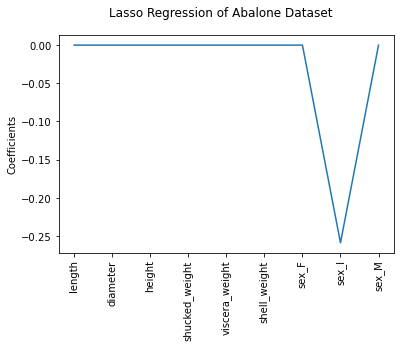

In [6]:
lasso = Lasso(alpha=0.6)

lasso_coef = lasso.fit(X,y).coef_
lasso_coef

X_labels = X.columns

n = plt.plot(range(len(X_labels)), lasso_coef)
n = plt.xticks(range(len(X_labels)), X_labels, rotation=90)
n = plt.ylabel('Coefficients')
n = plt.suptitle('Lasso Regression of Abalone Dataset')

plt.show()

In [7]:
# tune parameters for best learning rate = 0.01

input_shape = (len(X.columns),)

def model_func(input_shape=input_shape):
    model = keras.Sequential()
    model.add(layers.Dense(300, activation='relu', input_shape=input_shape))
    model.add(layers.Dense(300, activation='relu'))
    model.add(layers.Dense(1))
    return(model)

lr_list = [0.001, 0.01, 0.1]

for lr in lr_list:
    model=model_func()
    opt = tf.keras.optimizers.Adam(learning_rate=lr)
    model.compile(optimizer=opt, loss='mean_squared_error')
    model.fit(X,y, validation_split=0.3)

92/92 [==============================] - 1s 6ms/step - loss: 109.4567 - val_loss: 6.1635


In [8]:
#instantiate optimizer with lr = 0.01
adam = tf.keras.optimizers.Adam(learning_rate=0.01)

# create Keras ANN model using Sequential() and Dense hidden layers
model = keras.Sequential()
model.add(layers.Dense(100, activation='relu', input_shape=(len(X.columns),)))
model.add(layers.Dense(100, activation='relu'))
model.add(layers.Dense(1))

#compile model using optimizer and measuring loss as MSE
model.compile(optimizer=adam, loss='mean_squared_error')

#instantiate Early Stopping Monitor to stop when training set loss stops decreasing
early_stop = tf.keras.callbacks.EarlyStopping(monitor='loss', patience=2)

#fit model to training data
model.fit(X_train_sc, y_train, epochs=500, callbacks=[early_stop], verbose=False)


In [9]:
#training set RMSE
keras_train_rmse = np.sqrt(mean_squared_error(y_train, model.predict(X_train_sc)))
print('Keras model training RMSE: {:.3f}'.format(keras_train_rmse))

#use model to predict on validation set, calculate RMSE and print results
keras_test_rmse = np.sqrt(mean_squared_error(y_test, model.predict(X_test_sc)))
print('Keras model validation RMSE: {:.3f}'.format(keras_test_rmse))

Keras model training RMSE: 2.213
Keras model validation RMSE: 2.235


In [10]:
keras_train_mae = mean_absolute_error(y_train, model.predict(X_train_sc))
print('Keras model training MAE: {:.3f}'.format(keras_train_mae))

keras_test_mae = mean_absolute_error(y_test, model.predict(X_test_sc))
print('Keras model training MAE: {:.3f}'.format(keras_test_mae))

Keras model training MAE: 1.639
Keras model training MAE: 1.664


##### 4.	Write another algorithm to predict the same result as the previous question using either KNN or logistic regression.


In [11]:
# Grid Search to find optimal k value
params = {'n_neighbors': np.arange(5, 30, 2)}

k_neighbors = KNeighborsRegressor()

cv = GridSearchCV(k_neighbors, params, cv=5)
cv.fit(X_train_sc, y_train)
cv.best_params_

{'n_neighbors': 17}

In [12]:
#instantiate and fit KNR model 
knr = KNeighborsRegressor(n_neighbors = 17)
knr.fit(X_train_sc, y_train)

KNeighborsRegressor(n_neighbors=17)

In [13]:
#calculate training set RMSE
knr_train_rmse = np.sqrt(mean_squared_error(y_train, knr.predict(X_train_sc)))
print('KNR model training RMSE: {:.3f}'.format(knr_train_rmse))

#predict and calculate validation set RMSE
knr_test_rmse = np.sqrt(mean_squared_error(y_test, knr.predict(X_test_sc)))
print('KNR model validation RMSE: {:.3f}'.format(knr_test_rmse))

KNR model training RMSE: 2.115
KNR model validation RMSE: 2.205


In [14]:
knr_train_mae = mean_absolute_error(y_train, knr.predict(X_train_sc))
print('KNR model training MAE: {:.3f}'.format(knr_train_mae))

knr_test_mae = mean_absolute_error(y_test, knr.predict(X_test_sc))
print('KNR model training MAE: {:.3f}'.format(knr_test_mae))

KNR model training MAE: 1.460
KNR model training MAE: 1.567


##### 5.	Create a neural network using pytorch to predict the same result as question 3. 


In [32]:
#convert arrays to tensors for PyTorch

X_train_tensor = torch.FloatTensor(X_train.values)
X_test_tensor = torch.FloatTensor(X_test.values)

y_train_tensor = torch.FloatTensor(y_train.values)
y_test_tensor = torch.FloatTensor(y_test.values)

#reshape target tensors 
new_shape_train = (len(y_train_tensor), 1)
y_train_tensor_reshape = y_train_tensor.view(new_shape_train)

new_shape_test = (len(y_test_tensor), 1)
y_test_tensor_reshape = y_test_tensor.view(new_shape_test)


print(X_train_tensor.shape)
print(y_train_tensor.shape)

torch.Size([2923, 9])
torch.Size([2923])


In [33]:
#define PyTorch ANN model

class ANN_Model(nn.Module):
    
    def __init__(self, input_features=len(X.columns), 
                 hidden1=300, 
                 hidden2=300,
                 hidden3=300,
                 out_features=1):
        super().__init__()
        self.layer1con = nn.Linear(input_features, hidden1)
        self.layer2con = nn.Linear(hidden1, hidden2)
        self.layer3con = nn.Linear(hidden2, hidden3)
        self.out = nn.Linear(hidden3, out_features)
        
    def forward(self, x):
        x = F.relu(self.layer1con(x))
        x = F.relu(self.layer2con(x))
        x = F.relu(self.layer3con(x))
        x = self.out(x)
        return(x)

#call on model class
ann = ANN_Model()
loss_function = torch.nn.L1Loss()
optimizer = torch.optim.Adam(ann.parameters(), lr=0.01)

final_loss = []

for epoch in range(501):
    y_pred = ann.forward(X_train_tensor)
    loss = loss_function(y_pred, y_train_tensor_reshape)
    final_loss.append(loss)
    
    if epoch % 100 == 0:
        print(f'Epoch number {epoch} with loss: {loss}')
        
    optimizer.zero_grad()
    loss.backward()
    optimizer.step()

Epoch number 0 with loss: 10.04301929473877
Epoch number 100 with loss: 1.497714638710022
Epoch number 200 with loss: 1.4419760704040527
Epoch number 300 with loss: 1.437753438949585
Epoch number 400 with loss: 1.4233739376068115
Epoch number 500 with loss: 1.4226726293563843


In [34]:
#calculate predictions from training set, print RMSE and MAE
y_pred_train_torch = []

with torch.no_grad():
    for i, data in enumerate(X_train_tensor):
        prediction = ann(data)
        y_pred_train_torch.append(prediction)


#calculate predictions from validation set, print RMSE and MAE
y_pred_test_torch = []

with torch.no_grad():
    for i, data in enumerate(X_test_tensor):
        prediction = ann(data)
        y_pred_test_torch.append(prediction)


In [36]:
torch_train_rmse = np.sqrt(mean_squared_error(y_train_tensor, y_pred_train_torch))
print('PyTorch model training RMSE: {:.3f}'.format(torch_train_rmse))

torch_test_rmse = np.sqrt(mean_squared_error(y_test_tensor, y_pred_test_torch))
print('PyTorch model validation RMSE: {:.3f}'.format(torch_test_rmse))

print(' ')

torch_train_mae = mean_absolute_error(y_train_tensor, y_pred_train_torch)
print('PyTorch model training MAE: {:.3f}'.format(torch_train_mae))

torch_test_mae = mean_absolute_error(y_test_tensor, y_pred_test_torch)
print('PyTorch model validation MAE: {:.3f}'.format(torch_test_mae))

PyTorch model training RMSE: 2.101
PyTorch model validation RMSE: 2.159
 
PyTorch model training MAE: 1.433
PyTorch model validation MAE: 1.499


C:\Users\aspen\anaconda3\lib\site-packages\numpy\core\_asarray.py:102: FutureWarning: The input object of type 'Tensor' is an array-like implementing one of the corresponding protocols (`__array__`, `__array_interface__` or `__array_struct__`); but not a sequence (or 0-D). In the future, this object will be coerced as if it was first converted using `np.array(obj)`. To retain the old behaviour, you have to either modify the type 'Tensor', or assign to an empty array created with `np.empty(correct_shape, dtype=object)`.
  return array(a, dtype, copy=False, order=order)
C:\Users\aspen\anaconda3\lib\site-packages\numpy\core\_asarray.py:102: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  return array(a, dtype, copy=False, order=order)
C:\Users\aspen\anaconda3\lib\site-pack

##### 6.	Compare the performance of the neural networks to the other model you created. Which performed better? Why do you think that is?

The Keras and KNR models performed well and had training and testing MAE values to around 1.6. The PyTorch model was slightly lower, around 1.5. All of the models were roughly the same for MAE. I believe it is becasue this dataset has been preprocessed very well.

In [37]:
#Keras Model
print('Keras model training MAE: {:.3f}'.format(keras_train_mae))
print('Keras model validation MAE: {:.3f}'.format(keras_test_mae))
print(' ')
#KNR Model
print('KNR model training MAE: {:.3f}'.format(knr_train_mae))
print('KNR model validation MAE: {:.3f}'.format(knr_test_mae))
print(' ')
#PyTorch Model
print('PyTorch Model training MAE: {:.3f}'.format(torch_train_mae))
print('PyTorch Model validation MAE: {:.3f}'.format(torch_test_mae))

Keras model training MAE: 1.639
Keras model validation MAE: 1.664
 
KNR model training MAE: 1.460
KNR model validation MAE: 1.567
 
PyTorch Model training MAE: 1.433
PyTorch Model validation MAE: 1.499


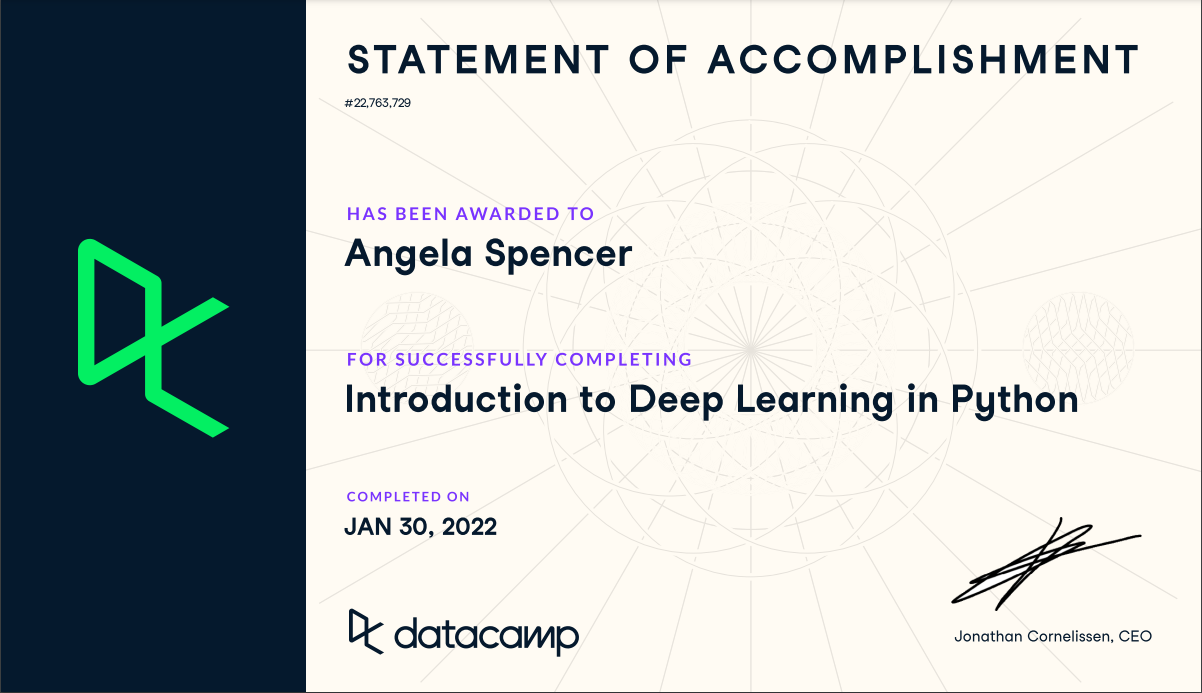